##Python for Finance

Valuation of a European call option by Monte Carlo simulation. We will consider a Black-Scholes-Merton (BSM) setup in which the option's underlying risk factor follows a geometric Brownian motion.

Suppose we have the following numerical parameter values for the valuation.

* Initial stock index level S_0 = 100
* Strike price of the European call option K = 105
* Time-to-maturity T = 1 year
* Constant, riskless short rate r = 5%
* Constant volatility v = 20%
    

In the BSM model, the index level at maturity is a random variable with z being a standard normal distributed random variable.

Equ 1: *Black-Scholes-Merton* (1973) index level at maturity

## $$S_T = S_0*e^{(r-\frac12\sigma^2)*T + \sigma\sqrt{T}z}$$

Equ 2: Monte Carlo estimator for European option

## $$C_0\approx e^{-r*T}\sum_Ih_T(i)$$

The following is an alogorithmic description of the Monte Carlo valuation process:

1. Draw N random numbers z(i), from the standard normal distribution
2. Calculate all resulting index levels at maturity S_t(i) for given z(i) and equ 1
3. Calculate all inner values of the option at maturity as h_t(i) = max(S_t(i) - K, 0)
4. Estimate the option present value via the Monte Carlo estimator given in equ 2   


In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2

In [21]:
N = 100000

In [22]:
z = np.random.standard_normal(N)
S_t = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * z)
h_t = np.maximum(S_t - K, 0)
C_0 = np.exp(-r * T) * np.sum(h_t) / N

In [23]:
print "Value of the European Call option %5.3f" % C_0

Value of the European Call option 8.062


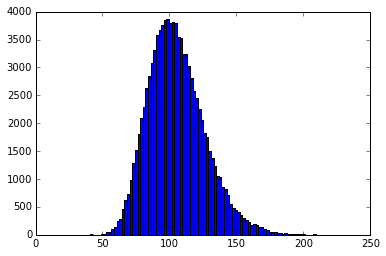

In [30]:
plt.hist(S_t, bins=100 )
a = 0